# Test alignment procedure
This file is used to test the alignment procedure using the center of the fiber core as a reference and the reflected laser beam.

In [1]:
import os
from time import sleep
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import cv2

import matplotlib

matplotlib.rc('figure', figsize=(15, 10))

DATA_DIR = "/home/aquiles/Data/Dispertech"

In [1]:
from dispertech.models.electronics.arduino import ArduinoModel
from dispertech.models.cameras.basler import Camera
from experimentor import Q_
from experimentor.models.decorators import make_async_thread
from dispertech.controller.devices.arduino.arduino import Arduino

In [193]:
ard = ArduinoModel(device=0)
ard.initialize()
# servo = ArduinoModel(device=1)
# servo.initialize()

In [192]:
Arduino.list_devices()

('ASRL/dev/ttyACM2::INSTR',)

In [14]:
servo.laser_power(0)
ard.move_servo(0)

In [5]:
cam = Camera('da')
cam.initialize()

434.2561708288093 631.1231897695741


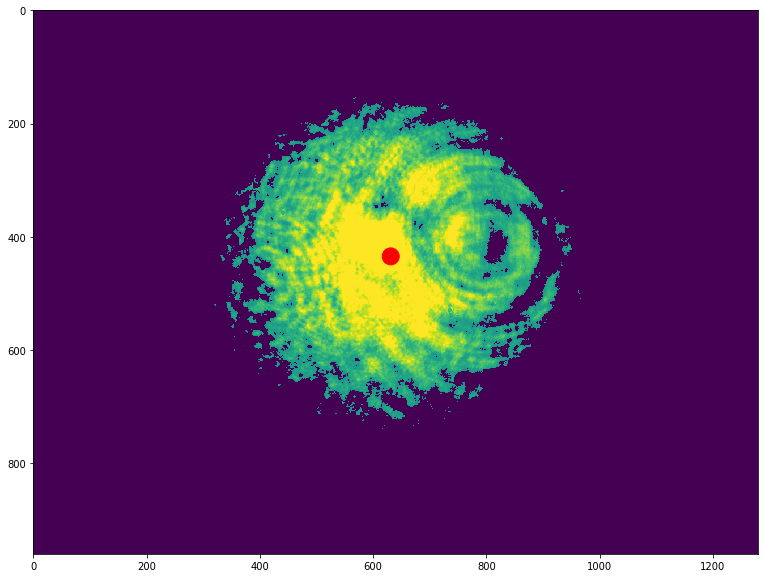

In [6]:
# ard.move_mirror(0, 0, 2)
ard.laser_power(30)
cam.set_exposure(Q_('.01ms'))
cam.trigger_camera()
img = cam.read_camera()[0]
mask = img>np.mean(img.reshape(img.size,1))+np.std(img.reshape(img.size,1))
test_img = mask*np.ones(img.shape, dtype=np.uint8)*2**8
M = cv2.moments(test_img)
cx = M['m10']/M['m00']
cy = M["m01"] / M["m00"]
print(cx, cy)
fig, ax = plt.subplots(1)
ax.imshow(mask.T*img.T)
circ = Circle((cy, cx), radius=15,color='red')
ax.add_patch(circ)

In [7]:
def acquire_from_camera(data, folder):
    if not os.path.isdir(os.path.join(data_folder, 'image_data', folder)):
        os.makedirs(os.path.join(data_folder, 'image_data', folder))
    for i in range(accumulations_per_position+1):
        cam.trigger_camera()
        img = cam.read_camera()[0]
        if i==0: continue
        mask = img>np.mean(img.reshape(img.size,1))+np.std(img.reshape(img.size,1))
        M = cv2.moments(mask*img)
        cx = M['m10']/M['m00']
        cy = M["m01"] / M["m00"]
        data[-1][0].append(cx)
        data[-1][1].append(cy)
    np.save(os.path.join(data_folder, 'image_data', folder, f'img_{i}'), img)

In [8]:
def make_plots(data, folder):
    fig, ax = plt.subplots(nrows=1, ncols=2)

    dt = np.array(data)
    C = np.zeros((2,len(data)))
    for i in range(len(data)):
        ax[0].plot(data[i][0],data[i][1], 'o')
        C[0][i] = np.mean(data[i][0])
        C[1][i] = np.mean(data[i][1])

    ax[1].plot(C[0,:],C[1][:], '.-')
    ax[0].set_aspect('equal')
    ax[1].set_aspect('equal')
    fig.suptitle(f'Speed: {speed}, Exposure Time {exposure_time:~}, Laser Power: {power}', fontsize=16)
    ax[0].set_title(f'Calculated centroid for {accumulations_per_position} acquisition')
    ax[0].set(xlabel='Centroid position (px)', ylabel='Centroid position (px)')
    ax[1].set_title('Averaged centroid')
    ax[1].set(xlabel='Centroid position (px)', ylabel='Centroid position (px)')

    plt.savefig(os.path.join(folder, f'centroids_speed_{speed}.png'))
    plt.close()

In [ ]:
speeds = [1, ]
laser_powers = [10,]
max_data_points = 200
accumulations_per_position = 25
exposure_time = Q_('1ms')

cam.set_exposure(exposure_time)
for power in laser_powers:
    data_folder = os.path.join(DATA_DIR, '{:~}'.format(exposure_time), f'laser_power_{power}')
    if not os.path.isdir(data_folder):
        os.makedirs(data_folder)
        os.makedirs(os.path.join(data_folder, 'image_data'))
    ard.laser_power(power)
    for speed in speeds:
        print(f'Acquiring: laser power: {power} - mirror speed: {speed}' )
        data = []
        for i in range(max_data_points):
            data.append(([],[]))
            acquire_from_camera(data, f'{speed}_12_{i}')
            ard.move_mirror(speed, 1, 2)
        make_plots(data, data_folder)
        for i in range(max_data_points):
            data.append(([],[]))
            acquire_from_camera(data, f'{speed}_11_{i}')
            ard.move_mirror(speed, 1, 1)
        make_plots(data, data_folder)
        for i in range(max_data_points):
            data.append(([],[]))
            acquire_from_camera(data, f'{speed}_02_{i}')
            ard.move_mirror(speed, 0, 2)
        make_plots(data, data_folder)
        for i in range(max_data_points):
            data.append(([],[]))
            acquire_from_camera(data, f'{speed}_01_{i}')
            ard.move_mirror(speed, 0, 1)
        make_plots(data, data_folder)

In [ ]:
test_img = mask*np.ones(img.shape, dtype=np.uint8)*2**8
circles = cv2.HoughCircles(test_img,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=100,maxRadius=0)

In [ ]:
fig, ax = plt.subplots(1)
ax.imshow(test_img.T)
# for i in range(circles.shape[1]):
#     cx = circles[0, i, 0]
#     cy = circles[0, i, 1]
#     rad = circles[0, i, 2]
#     circ = Circle((cy, cx), radius=rad,color='red')
#     ax.add_patch(circ)


In [ ]:
circles[0,1,1]

In [ ]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
im2 = cv2.medianBlur(img,5)

In [ ]:
plt.imshow(mask.T)

In [ ]:
type(mask)

In [ ]:
speed=1
direction = 1
axis = 1
binary_speed = '{0:06b}'.format(speed)
binary_speed = str(direction) + str(1) + binary_speed
number = int(binary_speed, 2)
bytestring = number.to_bytes(1, 'big')
print(ard.driver.query(f"mot{axis}"))
ard.driver.write_raw(bytestring)
print(ard.driver.read())

In [689]:
ard.move_mirror(1, 0, 1)

In [92]:
ard.fiber_led = 0

In [79]:
ard.driver.query("TEM:0")

'21.80\r\n'

In [78]:
ard.driver.query("TEM:1")

'21.25\r\n'

In [190]:
servo.laser_power(0)

In [191]:
ard.move_servo(0)